In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
def get_cost_table(dest_xy, current_xy, board_size):
    """
    return:
        g(s): table of actual cost
        h(s): table of heuristic cost
        f(s): table of g(s) + h(s)
    """
    G = np.zeros(board_size)
    H = np.zeros(board_size)
    F = np.zeros(board_size)

    for m in range(board_size[0]):
        for n in range(board_size[1]):
            G[m, n] = np.sqrt((m - current_xy[0]) ** 2 + (n - current_xy[1]) ** 2) 
            # **this g(s) assume that moving to any direction cost the same.
            # **we can make this function take an argument `wall` and make g(s) = infinity. 
            H[m, n] = np.sqrt((m - dest_xy[0]) ** 2 + (n - dest_xy[1]) ** 2)
            F[m, n] = G[m, n] + H[m, n]

    return G, H, F

def next_optimal_move(cost_table, current_xy, board_size):
    possible_moves = [(0,1), (0,-1), (-1,0), (1, 0)] # up, down, left, right
    nex_xys = []
    next_costs = []
    
    for move in possible_moves:
        new_x, new_y = np.add(current_xy, move)  
        if 0 <= new_x < board_size[0] and 0 <= new_y < board_size[1]:
            cost = cost_table[new_x, new_y]
        else: # move is invalid/outside the grid.
            cost = np.inf
        nex_xys.append((new_x, new_y))
        next_costs.append(cost)
    
    nex_xys = np.array(nex_xys)
    next_costs = np.array(next_costs)
    pi = np.argsort(next_costs)
    new_xy = nex_xys[pi][0]
    cost = next_costs[pi][0] # cost given that the optimal move is taken.
    return new_xy, cost

In [3]:
board_size = (15, 15)
len_iter = 30

INITIAL_XY = [0, 0]  # source coordinate
DEST_XY = [14, 14]  # destination coordinate
xys = [INITIAL_XY]  # current coordinate, starts from source
costs = [0]

INITIAL_XY = np.array(INITIAL_XY)

Initial state:  [0 0]
Destination state:  [14, 14]

Iter 27.. reach the destination.


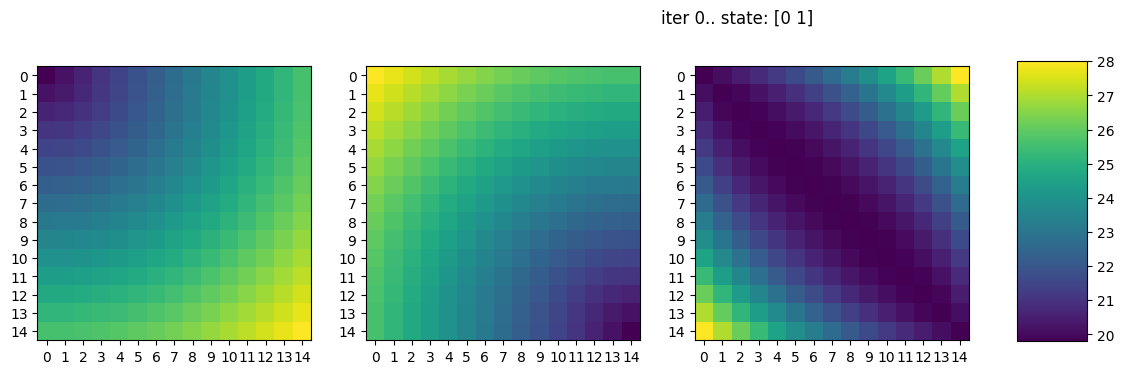

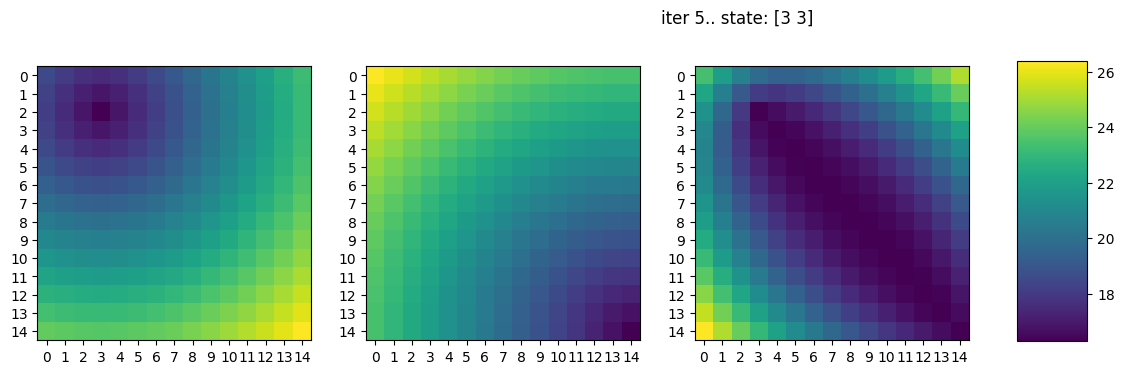

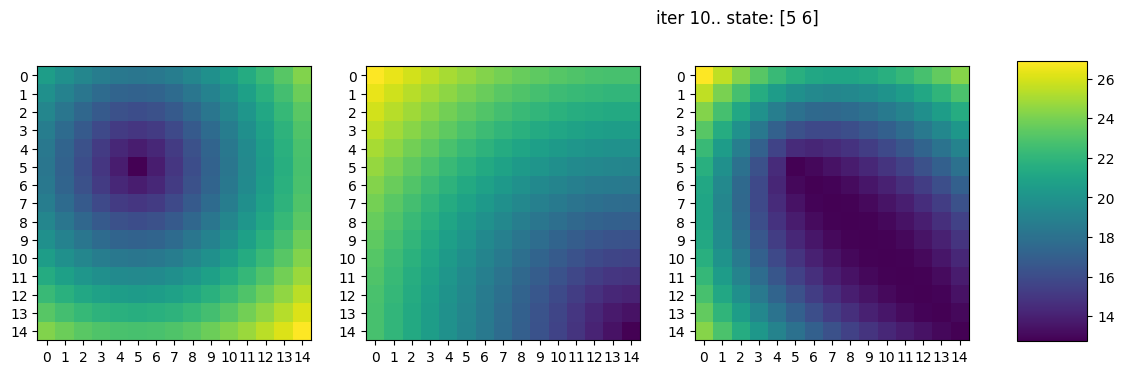

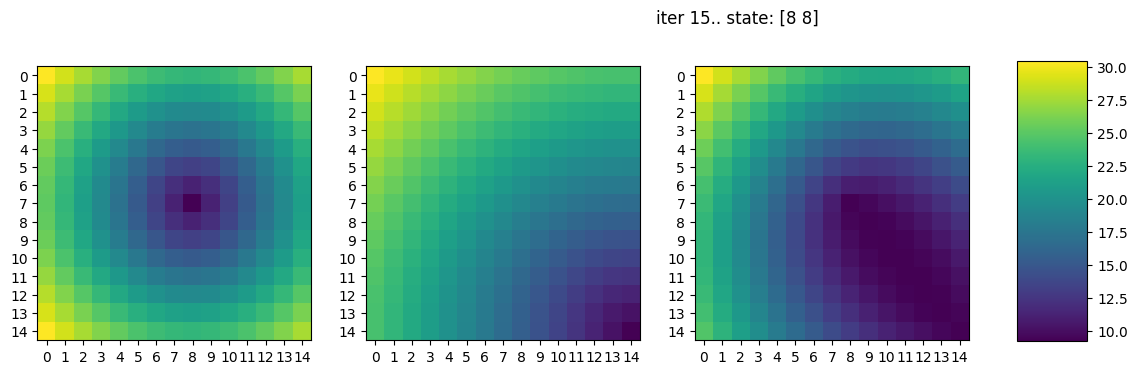

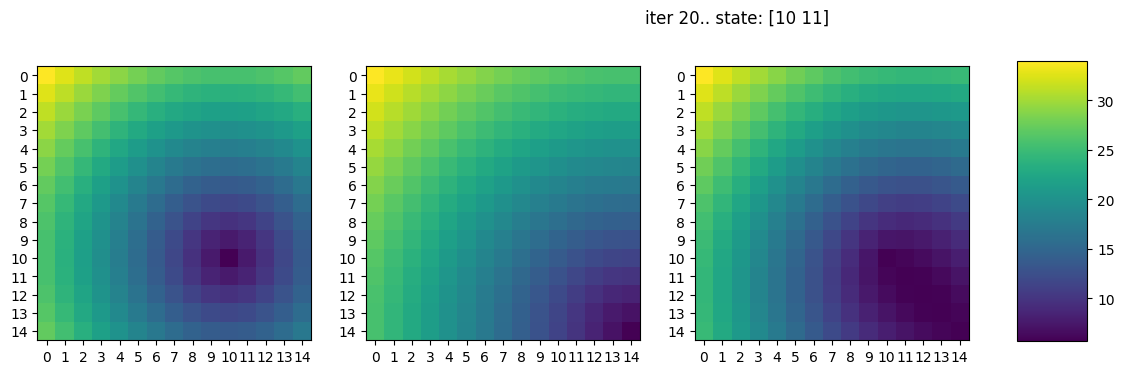

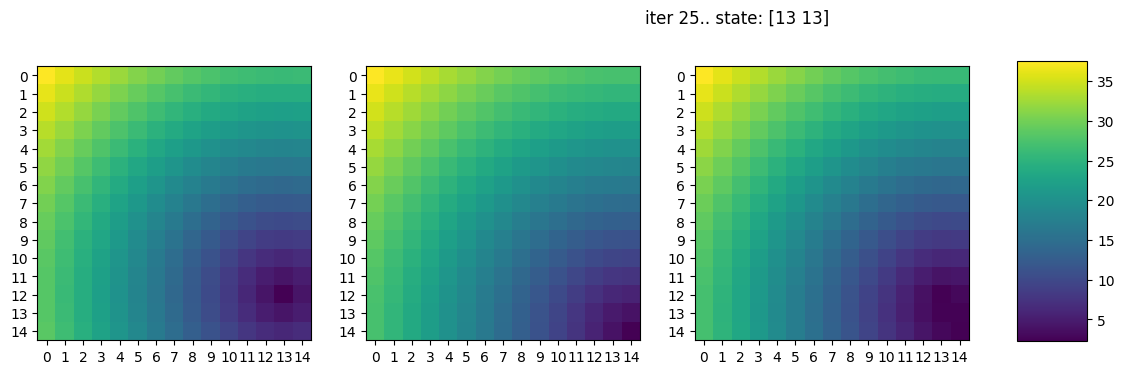

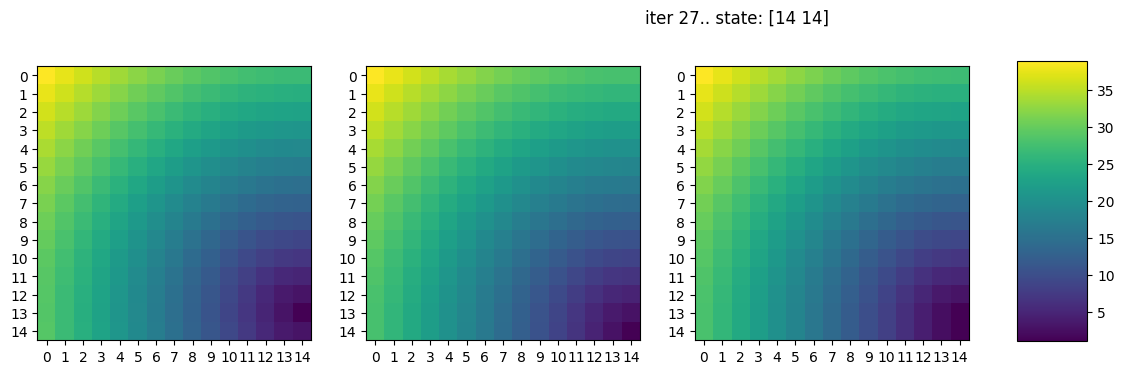

In [4]:
cost = 0
finishing = False

print("Initial state: ", INITIAL_XY)
print("Destination state: ", DEST_XY)
print()
for i in range(len_iter):
    G, H, F = get_cost_table(DEST_XY, xys[-1], board_size)
    new_xy, cost = next_optimal_move(F, xys[-1], board_size)
    
    
    xys.append(new_xy)
    costs.append(cost)
    
    if (xys[-1] == DEST_XY).all():
        print("Iter {}.. reach the destination.".format(i))
        finishing = True
        
    if not np.isfinite(cost):
        print("Infinite cost.")
        break
    
    # Plot every 5 frames
    if i % 5 == 0 or finishing:
        plt.figure(figsize=(14, 4))
        plt.suptitle("iter {}.. state: {}".format(i, xys[-1]))
        plt.subplot(1, 4, 1)
        plt.imshow(G)
        plt.xticks(range(board_size[0]))
        plt.yticks(range(board_size[1]))
        
        plt.subplot(1, 4, 2)
        plt.imshow(H)
        plt.xticks(range(board_size[0]))
        plt.yticks(range(board_size[1]))
        
        plt.subplot(1, 4, 3)
        plt.imshow(F)
        plt.xticks(range(board_size[0]))
        plt.yticks(range(board_size[1]))
        
        plt.subplots_adjust(left=0.0)
        cax = plt.axes([0.7, 0.15, 0.05, 0.7])  # adjust colorbar. [left, bottom, width, height].
        plt.colorbar(cax=cax)
    
    if finishing:
        break

In [6]:
total_cost = np.sum(costs)
total_cost

296.0350047690636

note: add walls in animation

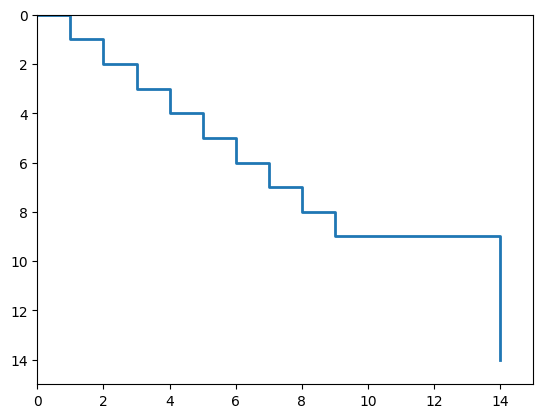

In [38]:
x_coords, y_coords = zip(*xys)

# Setting up the plot
fig, ax = plt.subplots()
ax.set_xlim(0, board_size[0])
ax.set_ylim(board_size[1], 0)
line, = ax.plot([], [], lw=2)

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# Animation function: this is called sequentially
def animate(i):
    line.set_data(y_coords[:i+1], x_coords[:i+1])
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=len(xys), interval=200, blit=True)
anim.save('anim_simple.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
HTML(anim.to_html5_video())

# adding wall

In [29]:
def get_cost_tablev2(dest_xy, current_xy, wall_xys, board_size):
    """
    return:
        g(s): table of actual cost
        h(s): table of heuristic cost
        f(s): table of g(s) + h(s)
    """
    G = np.zeros(board_size)
    H = np.zeros(board_size)
    F = np.zeros(board_size)

    for m in range(board_size[0]):
        for n in range(board_size[1]):
            G[m, n] = np.sqrt((m - current_xy[0]) ** 2 + (n - current_xy[1]) ** 2)
            # **this g(s) assume that moving to any direction cost the same.
            H[m, n] = np.sqrt((m - dest_xy[0]) ** 2 + (n - dest_xy[1]) ** 2)
    
    for x, y in wall_xys:
        G[x, y] = np.inf
        
    F = G + H
    return G, H, F

In [30]:
board_size = (15, 15)
len_iter = 100

INITIAL_XY = [0, 0]  # source coordinate
DEST_XY = [14, 14]  # destination coordinate
# WALL_XYS = [(10, 8), (10, 9), (10, 10), (10, 11)]
WALL_XYS = [(10, 8), (10, 9), (10, 10), (10, 11), (10, 12), (10, 13)]
# WALL_XYS = [(10, 8), (10, 9), (10, 10), (10, 11), (10, 12), (10, 13), (10, 14)]

xys = [INITIAL_XY]  # current coordinate, starts from source
costs = [0]

INITIAL_XY = np.array(INITIAL_XY)

Initial state:  [0 0]
Destination state:  [14, 14]

Iter 27.. reach the destination.


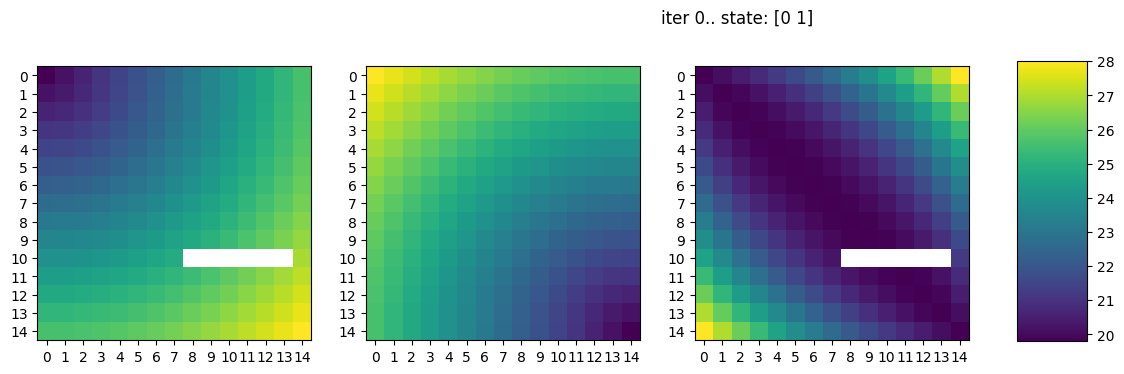

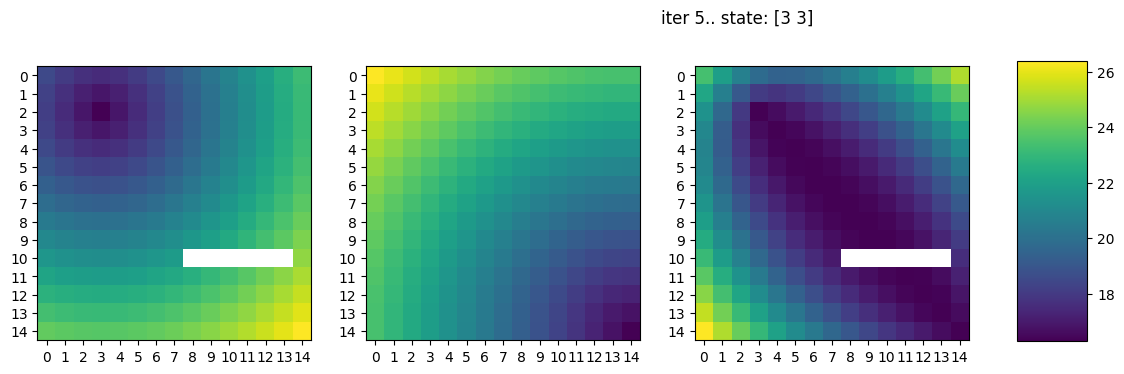

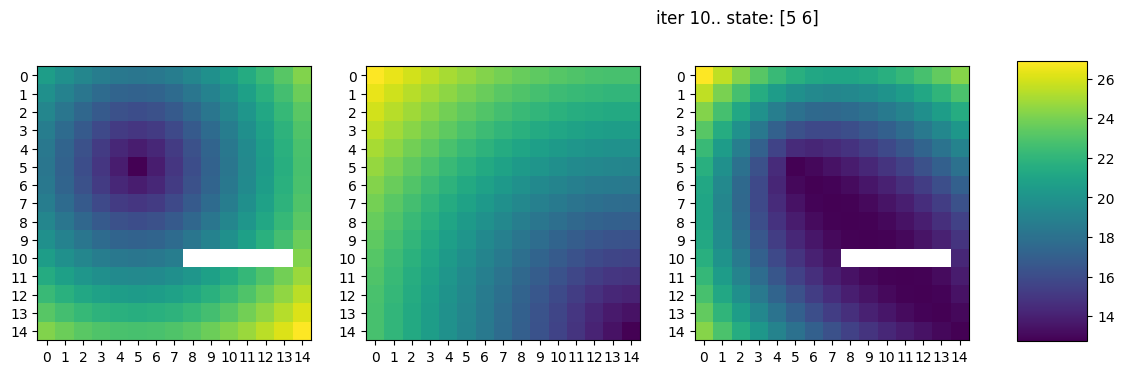

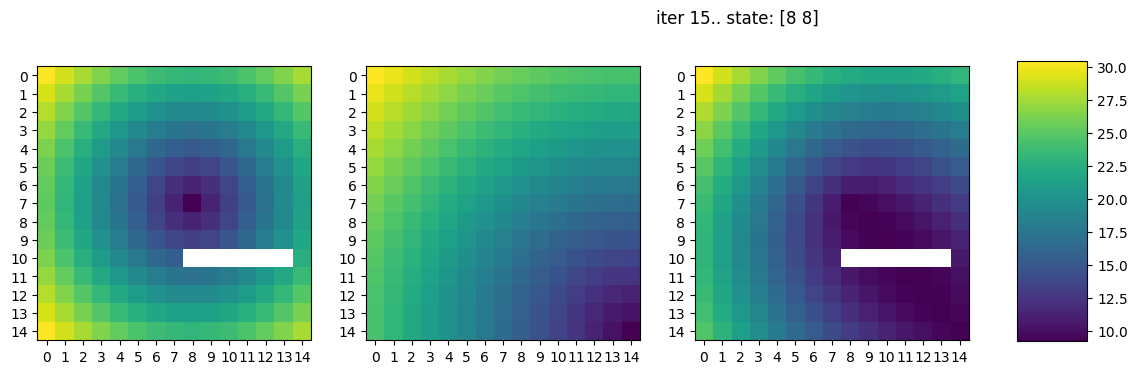

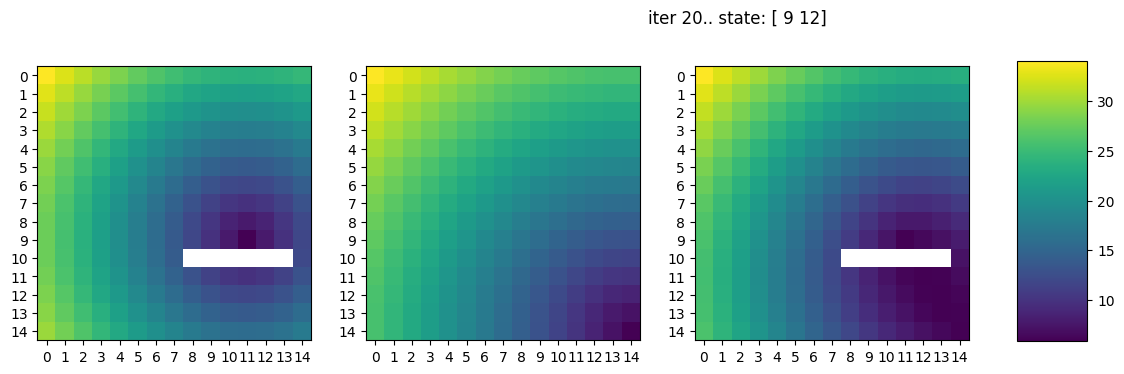

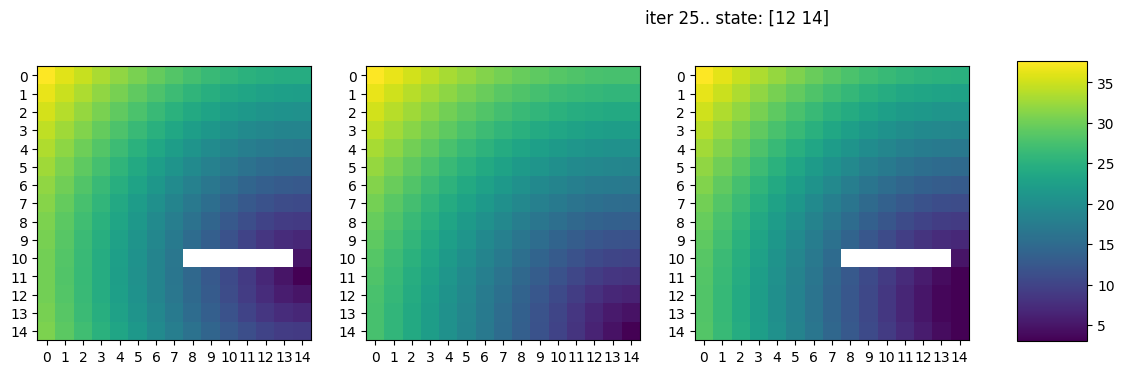

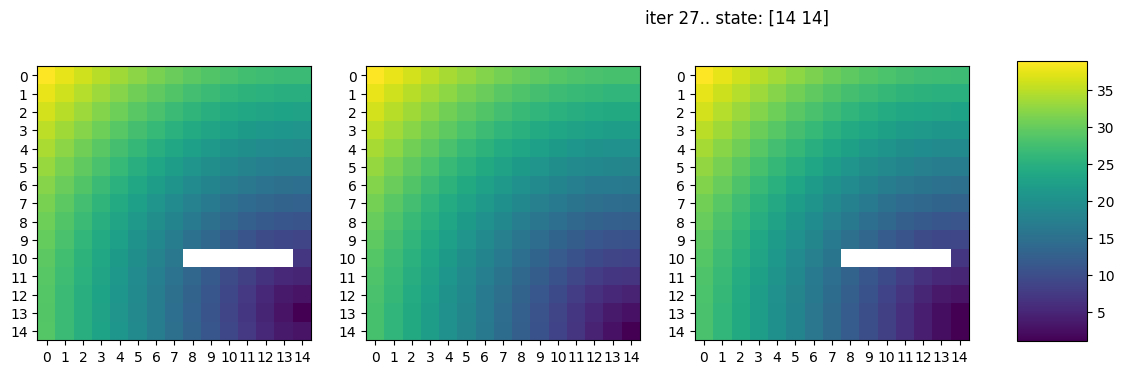

In [31]:
cost = 0
finishing = False

print("Initial state: ", INITIAL_XY)
print("Destination state: ", DEST_XY)
print()
for i in range(len_iter):
    G, H, F = get_cost_tablev2(DEST_XY, xys[-1], WALL_XYS, board_size)
    new_xy, cost = next_optimal_move(F, xys[-1], board_size)
    
    xys.append(new_xy)
    costs.append(cost)
    
    if (xys[-1] == DEST_XY).all():
        print("Iter {}.. reach the destination.".format(i))
        finishing = True
        
    if not np.isfinite(cost):
        print("Infinite cost.")
        break
    
    if i % 5 == 0 or finishing:
        plt.figure(figsize=(14, 4))
        plt.suptitle("iter {}.. state: {}".format(i, xys[-1]))
        plt.subplot(1, 4, 1)
        plt.imshow(G)
        plt.xticks(range(board_size[0]))
        plt.yticks(range(board_size[1]))
        
        plt.subplot(1, 4, 2)
        plt.imshow(H)
        plt.xticks(range(board_size[0]))
        plt.yticks(range(board_size[1]))
        
        plt.subplot(1, 4, 3)
        plt.imshow(F)
        plt.xticks(range(board_size[0]))
        plt.yticks(range(board_size[1]))
        
        plt.subplots_adjust(left=0.0)
        cax = plt.axes([0.7, 0.15, 0.05, 0.7])  # adjust colorbar. [left, bottom, width, height].
        plt.colorbar(cax=cax)
    
    if finishing:
        break

In [34]:
total_cost = np.sum(costs)
total_cost

301.3663861079415

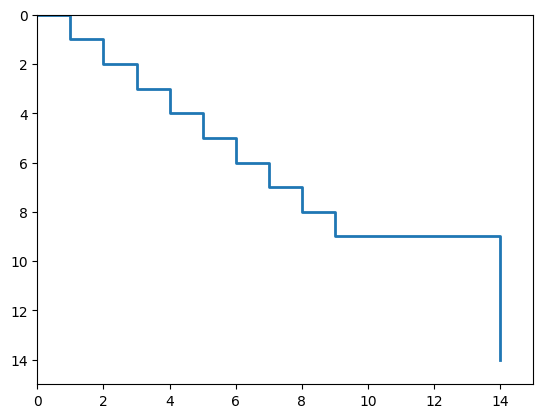

In [36]:
x_coords, y_coords = zip(*xys)

# Setting up the plot
fig, ax = plt.subplots()
ax.set_xlim(0, board_size[0])
ax.set_ylim(board_size[1], 0)
line, = ax.plot([], [], lw=2)

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# Animation function: this is called sequentially
def animate(i):
    line.set_data(y_coords[:i+1], x_coords[:i+1])
    return line,

# Call the animator
anim = FuncAnimation(fig, animate, init_func=init, frames=len(xys), interval=200, blit=True)

anim.save('anim_wall.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
HTML(anim.to_html5_video())